## 네이버 영화 박스오피스 크롤링 <hr>


In [29]:
## 모듈 로딩
from urllib.request import urlopen      ## 웹에서 url기반으로 다운로드
from bs4 import BeautifulSoup           ## 웹데이터 객체화 및 정보 추출용 모듈

In [30]:
## bs 객체 생성
url_path = r"https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%EB%B0%95%EC%8A%A4%EC%98%A4%ED%94%BC%EC%8A%A4"
data = urlopen(url_path).read()
mbs = BeautifulSoup(data, 'html.parser')
print(data)

b'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="strict-origin-when-cross-origin">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="\xeb\xb0\x95\xec\x8a\xa4\xec\x98\xa4\xed\x94\xbc\xec\x8a\xa4 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xeb\xb0\x95\xec\x8a\xa4\xec\x98\xa4\xed\x94\xbc\xec\x8a\xa4\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xeb\xb0\x95\xec\x8a\xa4\xec\x98\xa4\xed\x94\xbc\xec\x8a\xa4\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <title>\xeb\xb0\x95\xec\x8a\xa4\xec\x98\xa4\xed\x

In [31]:
## 전역 변수
arr = []

In [32]:
move_name = mbs.select_one('#main_pack > div.sc_new.cs_common_module.case_list.color_5._au_movie_list_content_wrap > div.cm_content_wrap > div > div > div.mflick > div._panel_popular._tab_content > div.list_image_info.type_pure_top > div > ul:nth-child(1) > li:nth-child(3) > a > div > div.title_box > strong')
print(move_name.text)

all_move_name = mbs.select('.name')
m_names_list = []
for n in all_move_name :
    print(n.text)
    m_names_list.append(n.text)

극장판 체인소 맨: 레제편
위키드: 포 굿
나우 유 씨 미 3
극장판 체인소 맨: 레제편
국보
프레데터: 죽음의 땅
나혼자 프린스
퍼스트 라이드
세계의 주인
극장판 귀멸의 칼날: 무한성편
극장판 똘똘이: 아기공룡의 ...
8번 출구
코렐라인
엔드 오브 에반게리온
가타카
극장판 주술회전: 회옥·옥절
포레스텔라 : 더 웨이브 인...
꼬마돼지 베이브와 타피티
부고니아
비정성시
극장판 노래하는☆왕자님♪ 타...
맨홀
제이홉 투어 ‘홉 온 더 스...
통잠
힘
너와 나의 5분
위키드
로보카폴리 사막 구조대 이야기
사하라 전차대
난징사진관
럭키 데이 인 파리
엔드 오브 에반게리온
극장판 체인소 맨: 레제편
국보
가타카
세계의 주인
극장판 귀멸의 칼날: 무한성편
제이홉 투어 ‘홉 온 더 스...
비정성시
위키드
프레데터: 죽음의 땅
너와 나의 5분
코렐라인
8번 출구
극장판 똘똘이: 아기공룡의 ...
난징사진관
극장판 주술회전: 회옥·옥절
부고니아
나우 유 씨 미 3
퍼스트 라이드
위키드: 포 굿
나혼자 프린스
럭키 데이 인 파리


In [33]:
## 각 링크에서 정보 빼오는 함수
 ## 예외 사항
    # - copy select으로 하면 영화마다 다름
    # - 네티즌 평점, 실관람색 평점 등 없는 영화도 있음
    # - 누적 관객 수 단위가 각자 다름
    
def func(href):
    url = 'https://search.naver.com/search.naver' + href
    d = urlopen(url).read()
    bs = BeautifulSoup(d, 'html.parser')

    ## 제목
    title_el = bs.select_one(
        'div.cm_top_wrap._sticky._custom_select._header h2 span.area_text_title > strong'
    )
    title = title_el.text.strip() if title_el else "제목없음"
    print(title)

    ## 실관람객 평점
    p_node = bs.select_one(
        'div.custom_info_wrap div:nth-child(2) span.this_text_bold'
    )
    p_score = p_node.text.strip() if p_node else 0
    print(p_score)

    ## 네티즌 평점
    n_node = bs.select_one(
        'div.custom_info_wrap div:nth-child(3) span.this_text_bold'
    )
    n_score = n_node.text.strip() if n_node else 0
    print(n_score)

    ## 순위
    rank_node = bs.select_one(
        'div.custom_info_wrap div:nth-child(1) span > em:nth-child(1)'
    )
    rank = rank_node.text.strip() if rank_node else "?"
    print(rank)

    ## 누적 관객 수
    p_size_node = bs.select_one(
        'div.custom_info_wrap div:nth-child(1) span > em:nth-child(2)'
    )
    p_size = p_size_node.text.strip() if p_size_node else "0"
    print(p_size)

    ## 누적 관객 단위
    unit_raw = bs.select_one(
        'div.custom_info_wrap div:nth-child(1) span'
    )
    p_unit_node = bs.select_one('div.cm_content_wrap > div.cm_content_area._cm_content_area_info > div > div.custom_info_wrap > div > div > div:nth-child(1) > div > div > span')
    p_unit = p_unit_node.text.strip() if p_size_node else "x" 
    if "억" in p_unit: p_unit = "억명" 
    elif "만" in p_unit: p_unit = "만명" 
    else: p_unit = "명" 
    print(p_unit)

    ## 리스트에 저장
    arr.append([title, p_score, n_score, rank, p_size, p_unit])

In [34]:
all_a = mbs.select('#main_pack > div.sc_new.cs_common_module.case_list.color_5._au_movie_list_content_wrap > div.cm_content_wrap > div > div > div.mflick > div._panel_popular._tab_content  .inner')
if len(arr) : arr = []
for a in all_a :
    print(a.attrs['href'])
    func(a.attrs['href'])

?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37041608&qvt=0&query=%EC%9C%84%ED%82%A4%EB%93%9C%3A%20%ED%8F%AC%20%EA%B5%BF
위키드: 포 굿
7.54
6.79
1
40
만명
?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=2716530&qvt=0&query=%EB%82%98%EC%9A%B0%20%EC%9C%A0%20%EC%94%A8%20%EB%AF%B8%203
나우 유 씨 미 3
7.83
7.20
2
92
만명
?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37363629&qvt=0&query=%EA%B7%B9%EC%9E%A5%ED%8C%90%20%EC%B2%B4%EC%9D%B8%EC%86%8C%20%EB%A7%A8%3A%20%EB%A0%88%EC%A0%9C%ED%8E%B8
극장판 체인소 맨: 레제편
9.27
9.36
3
325
만명
?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37520907&qvt=0&query=%EA%B5%AD%EB%B3%B4
국보
9.11
9.48
4
4.5
만명
?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36831199&qvt=0&query=%ED%94%84%EB%A0%88%EB%8D%B0%ED%84%B0%3A%20%EC%A3%BD%EC%9D%8C%EC%9D%98%20%EB%95%85
프레데터: 죽음의 땅
8.62
9.12
5
40
만명
?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=35072207&qvt=0&query=%EB%82%98%ED%98%BC%EC%9E%90%20%ED%94%84%EB%A6%B0%EC%8A%A4
나혼자 프린스
7.53
7.32
6
2.8
만명
?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=3

In [35]:
## 배열 df로 변환
import pandas as pd
df = pd.DataFrame(arr)

df.columns = ['영화제목', '실관람객 평점', '네티즌 평점', '순위', '누전 관객 수', '관객단위']
display(df)
df.to_csv('output.csv', index=False)



,영화제목,실관람객 평점,네티즌 평점,순위,누전 관객 수,관객단위
0,위키드: 포 굿,7.54,6.79,1,40,만명
1,나우 유 씨 미 3,7.83,7.20,2,92,만명
2,극장판 체인소 맨: 레제편,9.27,9.36,3,325,만명
3,국보,9.11,9.48,4,4.5,만명
4,프레데터: 죽음의 땅,8.62,9.12,5,40,만명
5,나혼자 프린스,7.53,7.32,6,2.8,만명
6,퍼스트 라이드,7.57,5.53,7,72,만명
7,세계의 주인,9.08,9.21,8,12,만명
8,극장판 귀멸의 칼날: 무한성편,9.03,9.14,9,564,만명
9,극장판 똘똘이: 아기공룡의 비밀,8.14,9.23,10,3.3,만명


#### 간단한 데이터 분석 <hr>

In [36]:
## 평점 요약
df[['실관람객 평점', '네티즌 평점']].describe()


,실관람객 평점,네티즌 평점
count,30,30
unique,28,24
top,0,0
freq,3,6


In [38]:
## 관객 수 숫자로 변환 코드
def convert_to_number(size, unit):
    size = float(size.replace(",", "").strip())

    if unit == "억명":
        return size * 100000000
    elif unit == "만명":
        return size * 10000
    else:
        return size

df['관객수'] = df.apply(lambda x: convert_to_number(x['누전 관객 수'], x['관객단위']), axis=1)
df



,영화제목,실관람객 평점,네티즌 평점,순위,누전 관객 수,관객단위,관객수
0,위키드: 포 굿,7.54,6.79,1,40,만명,400000.0
1,나우 유 씨 미 3,7.83,7.20,2,92,만명,920000.0
2,극장판 체인소 맨: 레제편,9.27,9.36,3,325,만명,3250000.0
3,국보,9.11,9.48,4,4.5,만명,45000.0
4,프레데터: 죽음의 땅,8.62,9.12,5,40,만명,400000.0
5,나혼자 프린스,7.53,7.32,6,2.8,만명,28000.0
6,퍼스트 라이드,7.57,5.53,7,72,만명,720000.0
7,세계의 주인,9.08,9.21,8,12,만명,120000.0
8,극장판 귀멸의 칼날: 무한성편,9.03,9.14,9,564,만명,5640000.0
9,극장판 똘똘이: 아기공룡의 비밀,8.14,9.23,10,3.3,만명,33000.0


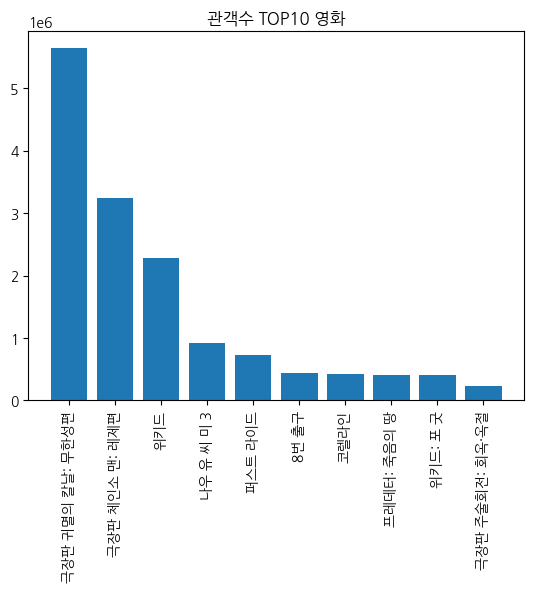

In [47]:
## 관객수 기준 Top 10
top10 = df.sort_values(by='관객수', ascending=False).head(10)

import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.bar(top10['영화제목'], top10['관객수'])
plt.xticks(rotation=90)
plt.title('관객수 TOP10 영화')
plt.show()


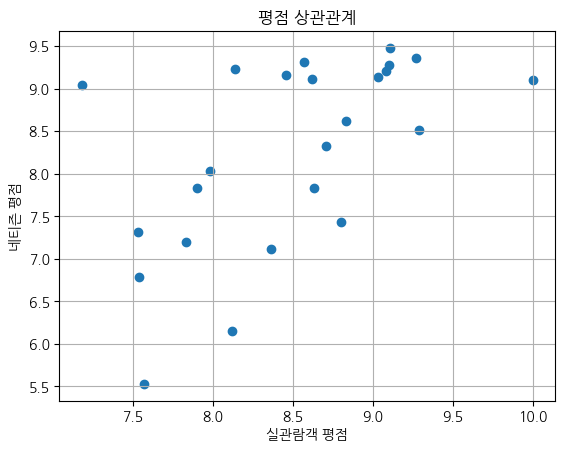

,실관람객 평점,네티즌 평점
실관람객 평점,1.000000,0.571204
네티즌 평점,0.571204,1.000000


In [ ]:
## 실관람객 평점 vs 네티즌 평점 비교
## 0(없었던 값들 처리)
# 두 컬럼을 숫자로 강제 변환 (문자 → 숫자, 변환 불가는 NaN 처리)
df['실관람객 평점'] = pd.to_numeric(df['실관람객 평점'], errors='coerce')
df['네티즌 평점'] = pd.to_numeric(df['네티즌 평점'], errors='coerce')

df = df[(df['실관람객 평점'] != 0) & (df['네티즌 평점'] != 0)]

plt.scatter(df['실관람객 평점'], df['네티즌 평점'])
plt.xlabel('실관람객 평점')
plt.ylabel('네티즌 평점')
plt.title('평점 상관관계')
plt.grid(True)
plt.show()

df[['실관람객 평점', '네티즌 평점']].corr()

